# Project : Heart Disease Classifier

This project uses Machine learning classification algorithms like LogisticRegression, KNeighboursClassifier, RandomForestClassifier to classify if the patient has a heart disease or not.

The project steps involve:
1. Importing necessary libraries, models, and funcitons.
2. Getting the dataset from the source (https://www.kaggle.com/c/heart-disease-uci/data)
3. Data preparation (handling null values, remove unnecessary data, etc) 
4. Visualisation to analyse the data corelation and output dependency on the data features.
5. Selecting the classifier (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
5. Making train and test sets and training the classifiers to obtain base line model and eliminating some models based on accuracy.
6. Model evaluation using classification report, recall score, f1 score, etc.
7. Hyperparameter tuning using RandomSearchCV and GridSearchCV.
9. Finding the effective features using model.

## About the data set
Dataset source (https://www.kaggle.com/c/heart-disease-uci/data)

There are 14 columns:

* age. The age of the patient.
* sex. The gender of the patient. (1 = male, 0 = female).
* cp. Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
* trestbps. Resting blood pressure in mmHg.
* chol. Serum Cholestero in mg/dl.
* fbs. Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
* restecg. Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
* thalach. Max heart rate achieved.
* exang. Exercise induced angina (1 = yes, 0 = no).
* oldpeak. ST depression induced by exercise relative to rest.
* slope. Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
* ca. Number of major vessels (0–3) colored by flourosopy.
* thal. Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
* num. Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

### Explanation of some functions used in the project
1. head() or pandas.DataFrame.head 
* It is a function which returns the first n rows for the object based on postion. It is useful for quicly testing if the object has the right type of data in it. We can also used negative index in head().

2. read_csv() 
* It is function in the Pandas library used to import the data which is stored in a Comma Separated Value file (CSV). It takes the location of th file as input parameter.

3. info() or Pandas dataframe.info() 
* The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

4. isna() 
* Detect missing values, Return a boolean same-sized object indicating if the values are NA.

5. sum() 
* adds all the values given to it as input.

6. describe() Pandas describe() 
* it is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

7. corr() 
* It is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. Note: The correlation of a variable with itself is 1.

8. value_counts() 
* It is a Pandas function for Series which Return a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

9. mean() function 
* can be used to calculate mean/average of a given list of numbers. It returns mean of the data set passed as parameters.

10. crosstab() 
* Compute a simple cross tabulation of two (or more) factors. By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

11. item() 
* The items() method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.

12. Heatmap 
* It is a used to Plot rectangular data as a color-encoded matrix.

13. Scatter plot 
* plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis.

14. Bar plot 
* A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

15. Score function 
* It is different for classifiers and regressors but more or less it uses the formula to find the accuracy of the trained model on the basis of the test data and labels provided in parameters. For Classifiers score returns the mean accuracy on the given test data and labels.

16. Fit() 
* it is the function used to train the Model using the training data and labels.

17. best_params_ 
* It returns the best parameter combination obtained after RandomSearchCV or GridSearchCV is performed on the model for Hyperparameter tuning.

### 1. Importing necessary libraries, models, and funcitons.

In [2]:
#importing all the libraries

# For EDA(Explanatory Data Analysis) and data visualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# The classification models used in the project
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.metrics import plot_roc_curve

### 2. Getting the dataset from the source

In [3]:
#importing the data and getting a preview of it
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<AxesSubplot:>

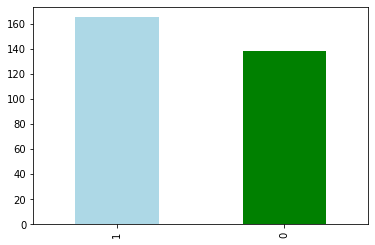

In [4]:
#to visualise the output classes
heart_disease["target"].value_counts().plot(kind = "bar", color=["lightblue","green"])

### 3.Data preparation

In [5]:
# Getting into our dataset
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
#checkcing if the data is null or not
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 4. Visualisation to analyse the data corelation and output dependency on the data features.

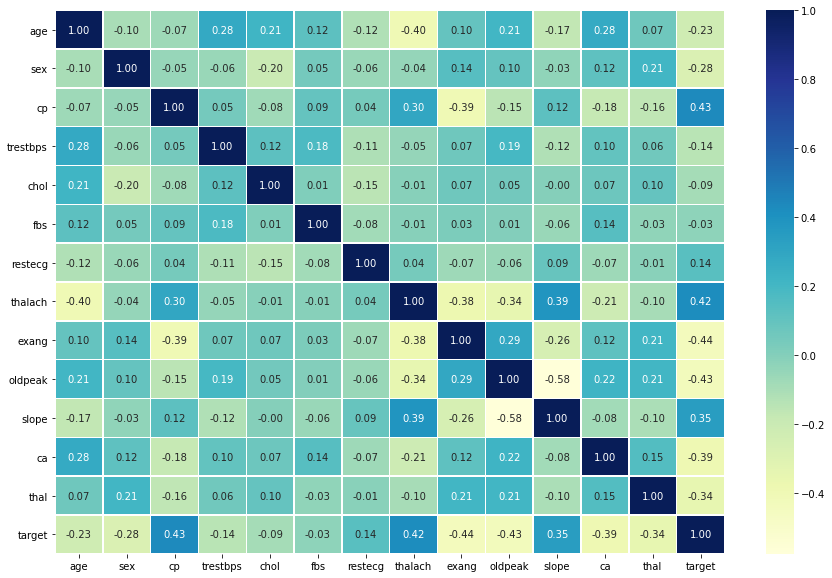

In [8]:
# finding the co-relation between the features and target using corr and heatmap
corr_values = heart_disease.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_values,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

In [9]:
#comparting some of the columns
print(heart_disease.sex.value_counts())
print()
pd.crosstab(heart_disease.target, heart_disease.sex)

1    207
0     96
Name: sex, dtype: int64



sex,0,1
target,,
0,24,114
1,72,93


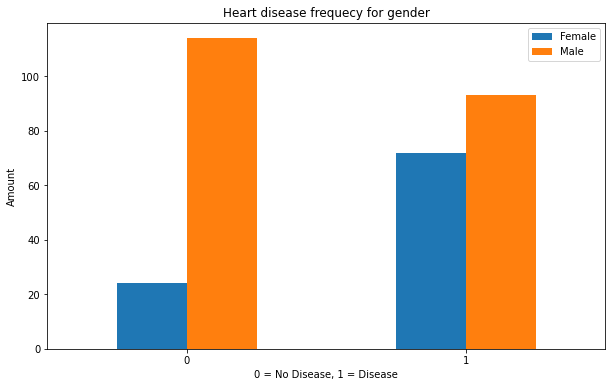

In [10]:
pd.crosstab(heart_disease.target, heart_disease.sex).plot(kind ="bar", 
                                                         figsize = (10,6),
                                                         )
plt.title("Heart disease frequecy for gender")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

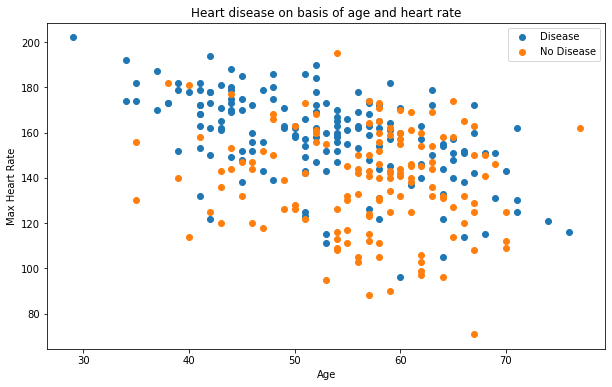

In [11]:
# getting realtion btw the other features too
# here i have used the scatter because there are plenty of different values

plt.figure(figsize=(10,6))

#ploting the scatter graph
plt.scatter(heart_disease.age[heart_disease.target == 1],
           heart_disease.thalach[heart_disease.target == 1])

plt.scatter(heart_disease.age[heart_disease.target == 0],
           heart_disease.thalach[heart_disease.target == 0])

#Adding details to the plot
plt.title("Heart disease on basis of age and heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16



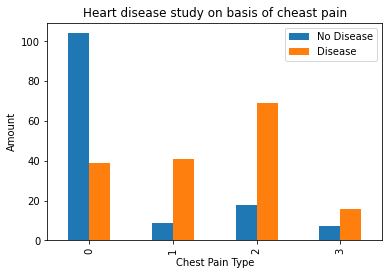

In [12]:
# finding the relation of chest pain with the heart disease
print(pd.crosstab(heart_disease.cp, heart_disease.target))
print()
pd.crosstab(heart_disease.cp, heart_disease.target).plot(kind = "bar")
plt.title("Heart disease study on basis of cheast pain")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"]);

In [13]:
# preparing and spliting the data 
X = heart_disease.drop("target", axis = 1)
Y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [14]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2


In [15]:
y_train.head()

273    0
101    1
129    1
150    1
153    1
Name: target, dtype: int64

### 5. Selecting the classifier
source: (https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to select the classifier.
Extra classifier (Logistic Regression not in the source image)


### 6. Making train and test sets and training the classifiers to obtain base line model and eliminating some models based on accuracy.
## Classifiers
1. Logistic regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


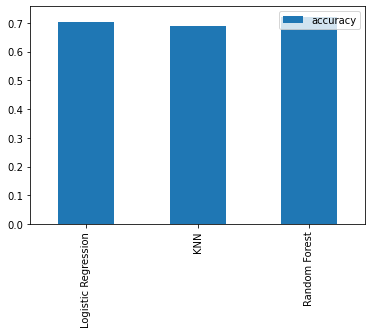

In [16]:
# putting the model in a dictionary so that we can loop on it
models_dict = {"Logistic Regression":LogisticRegression(),
              "KNN":KNeighborsClassifier(),
              "Random Forest": RandomForestClassifier()}

#functiont to fit models and returnt the respective scores dictionary
def model_fit_score(models_dict, x_train, y_train, x_test, y_test):
    scores = {}
    
    for name, model in models_dict.items():
        #fiting the model
        model.fit(x_train, y_train)
        
        #to store the score values on test data after fitting
        scores[name] = model.score(x_test,y_test)
        
    return scores

#calling the function and getting the scores
scores = model_fit_score(models_dict, x_train, y_train, x_test, y_test)

model_compare = pd.DataFrame(scores, index=["accuracy"])
model_compare.T.plot.bar();

## The next stage
These are some of the things we will be dealing in further steps
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross_validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area Under the curve (AUC)

### 8. Hyperparameter tuning using RandomSearchCV and GridSearchCV.

## Hyperparameter Tuning
First we search for the hyperparameters which influence the models accuracy most and than we use them for RandomizedSearchCV and GridSearchCV to get more accurate hyperparameters we need for highest accuracy

In [17]:
# for an instance lets look into to hyperparameter of KNeighborsClassifier which is n_neighbors

train_scores = []
test_scores = []

# list of values of neighbors
neighbors = range(1,21)

# Making the instance of the model
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # fitting the model
    knn.fit(x_train, y_train)
    
    # appending the values in scores
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test,y_test))

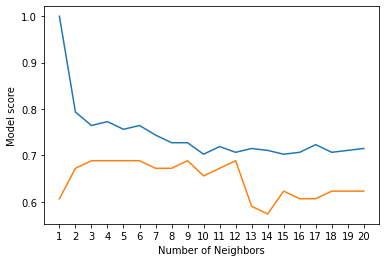

In [18]:
#ploting the performance scores of training and testing to understand effect of tuning and find value of neighbor
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model score")
plt.xticks(np.arange(1,21,1));

## Hyperparameter tuning using RandomizedSearchCV

In [19]:
# create a hyperparameter grid for logistic regression
logistic_grid = {"C":np.logspace(-4,4,20),
                 "solver":["liblinear"]
                }

# creating hyperparameter grid for RandomForestClassifier
random_grid = {"n_estimators":np.arange(10,1000,50),
               "max_depth":[None, 3, 5, 10],
               "min_samples_split":np.arange(2,20,2),
               "min_samples_leaf":np.arange(1,20,2)
    
}

In [20]:
#setting a seed
np.random.seed(42)

#setting things up
rs_logistic = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = logistic_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

#fiting the model
rs_logistic.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [21]:
rs_logistic.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [22]:
rs_logistic.score(x_test,y_test)

0.7049180327868853

In [23]:
rs_random = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = random_grid,
                          cv=5,
                          n_iter=20,
                          verbose = True)

rs_random.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [24]:
#finding the best params
rs_random.best_params_

{'n_estimators': 260,
 'min_samples_split': 8,
 'min_samples_leaf': 13,
 'max_depth': 10}

In [25]:
rs_random.score(x_test,y_test)

0.6885245901639344

* we eliminate the randomforest as logistic regression is performing better

### Hyperparameter tuning using GridSearchCV

In [26]:
# for the grid search for grid search
logistic_grid_grid = {"C":np.logspace(-4,4,30),
                     "solver":["liblinear"]}


gs_logistic = GridSearchCV(LogisticRegression(),
                          param_grid = logistic_grid_grid,
                          cv = 5,
                          verbose=True)

gs_logistic.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [27]:
gs_logistic.best_params_

{'C': 17.433288221999874, 'solver': 'liblinear'}

In [28]:
gs_logistic.score(x_test, y_test)

0.7213114754098361

In [29]:
gs_logistic.score(x_train, y_train)

0.8760330578512396

### 7. Model evaluation using different functions
Here as we had 2 models so instead of evaluating both the models we first eliminated one of them based on the results of performance after hyperparameter tuning.

In [30]:
#first getting the predicted values
y_preds = gs_logistic.predict(x_test)

## ROC curve
* plots true positive vs false positive values

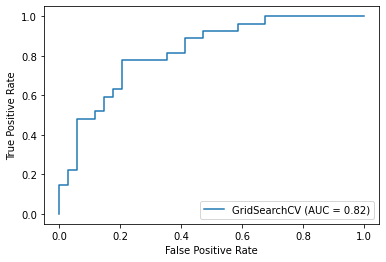

In [31]:
plot_roc_curve(gs_logistic, x_test, y_test);

## Confusion matrix

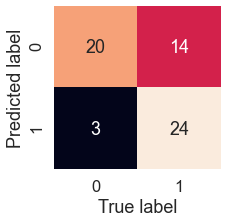

In [32]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test,  y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot = True,
                    cbar = False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
plot_conf_mat(y_test, y_preds)

## Classification report

In [33]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70        34
           1       0.63      0.89      0.74        27

    accuracy                           0.72        61
   macro avg       0.75      0.74      0.72        61
weighted avg       0.76      0.72      0.72        61



## model evalaution on cross val data

In [34]:
#initializing the model
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")

In [35]:
def score_val(model, X, Y, CV, t_score):
    scoreval = cross_val_score(model, X,Y,cv = CV, scoring = t_score)
    scoreval = np.mean(scoreval)
    return scoreval

In [36]:
list_eval = ["accuracy","precision","recall", "f1"]
scores = {}
for i in list_eval:
    scores[i] = score_val(clf, X, Y, 5, i)

In [37]:
scores

{'accuracy': 0.8446994535519124,
 'precision': 0.8207936507936507,
 'recall': 0.9212121212121213,
 'f1': 0.8673007976269721}

<AxesSubplot:title={'center':'cross'}>

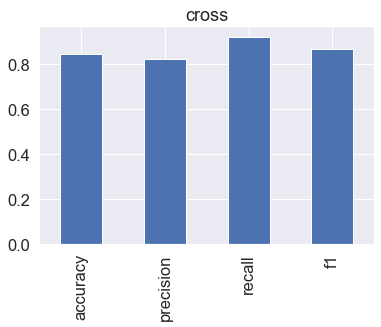

In [39]:
df = pd.DataFrame.from_dict(scores, orient = "index", columns = ["value"])
df.plot.bar(title="cross", legend=False);

## 9. Finding the effective features using model.

In [40]:
#we can find the effective features of data from the trained model using coef_
#initializing the model
clf = LogisticRegression(C = 0.20433597178569418,
                        solver = "liblinear")
clf.fit(x_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [41]:
clf.coef_

array([[ 1.80643273e-02, -6.99669097e-01,  8.86434570e-01,
        -1.45287905e-02, -9.39039439e-05,  5.85650978e-02,
         3.49749231e-01,  2.10145875e-02, -6.83619065e-01,
        -5.73144907e-01,  2.92851061e-01, -7.18695594e-01,
        -6.84420579e-01]])

In [42]:
#dictionary of the features 
features_dict = dict(zip(X.columns, list(clf.coef_[0])))
features_dict

{'age': 0.018064327293564605,
 'sex': -0.6996690971117665,
 'cp': 0.8864345696687757,
 'trestbps': -0.014528790522519763,
 'chol': -9.390394388760229e-05,
 'fbs': 0.05856509784474574,
 'restecg': 0.3497492305345372,
 'thalach': 0.02101458751323655,
 'exang': -0.6836190649847722,
 'oldpeak': -0.5731449071156396,
 'slope': 0.2928510612901883,
 'ca': -0.7186955937560991,
 'thal': -0.6844205787535813}

<AxesSubplot:title={'center':'Feature Importance'}>

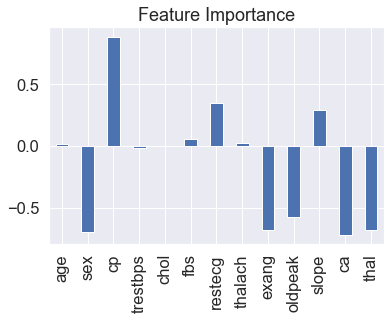

In [43]:
#data frame
feature_df = pd.DataFrame(features_dict, index = [0])
feature_df.T.plot.bar(title="Feature Importance", legend = False);

* the graph tells how the features are corelated with the output
* this can also be observed from the co relation matrix that we made in the data analysis part
* the positive corelation tells if the value increase the output goes towa 1
* the negative corelation tells if the value increases the output goes towards 0